In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'L1VzZXJzL2NoZXJ5bGtvdWFkaW8vRG9jdW1lbnRzL1JlcG9zaXRvcmllcy9wZXJzb25hbC13ZWJzaXRlLzNBL3ZhbHVlLWF0LXJpc2s='
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

{"/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/importlib/_bootstrap.py": 1731323902.0, "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/importlib/_bootstrap_external.py": 1731323902.0, "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/codecs.py": 1731323889.0, "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/encodings/aliases.py": 1731323904.0, "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/encodings/cp437.py": 1731323905.0, "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/encodings/__init__.py": 1731323904.0, "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/encodings/utf_8.py": 1731323906.0, "/Library/Developer/CommandLineT

/var/folders/4g/2x7xwt6106l13nxqljfks4gm0000gn/T/ipykernel_43668/3434538895.py:25: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


In [2]:
# Définition des librairies
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from tqdm import tqdm

/Users/cherylkouadio/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning:

urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020



In [3]:
# Import des données du CAC 40
data = yf.download("^FCHI")

# Calcul des rendements logarithmiques
data['log_return'] = np.log(data['Close'] / data['Close'].shift(1))

# Retirer la première ligne
data = data.dropna()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

In [4]:
train = data[['log_return',"Close"]]['15-10-2008':'26-07-2022']
data_train = train['log_return']

test = data[['log_return',"Close"]]['27-07-2022':'11-06-2024']
data_test = test['log_return']

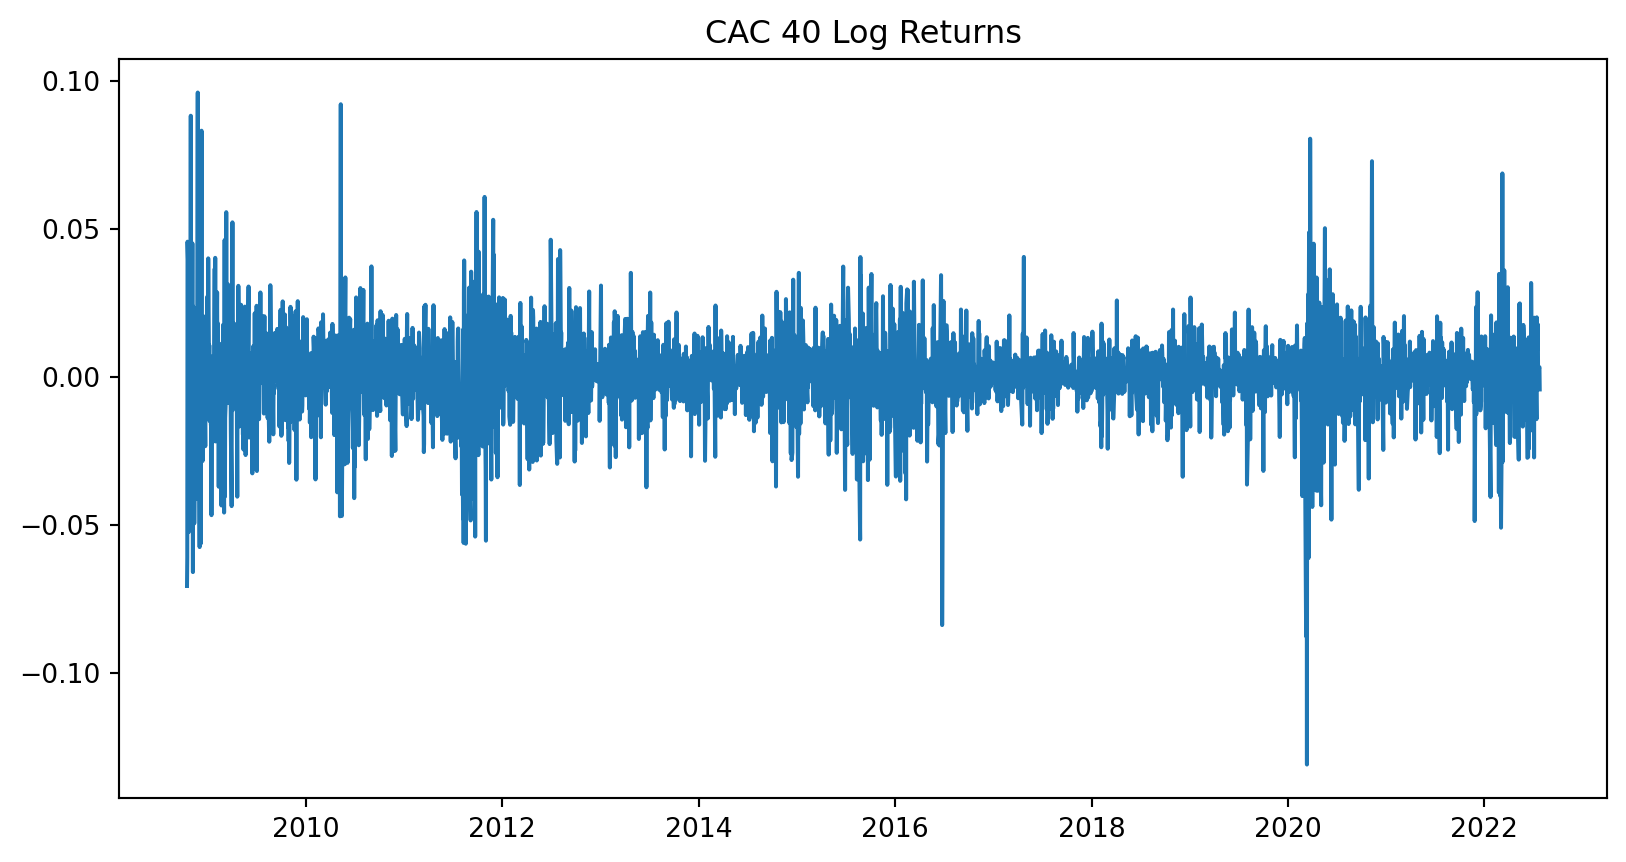

In [5]:
plt.figure(figsize=(10, 5))
plt.plot(data_train, label='Train')
plt.title('CAC 40 Log Returns')
plt.show()

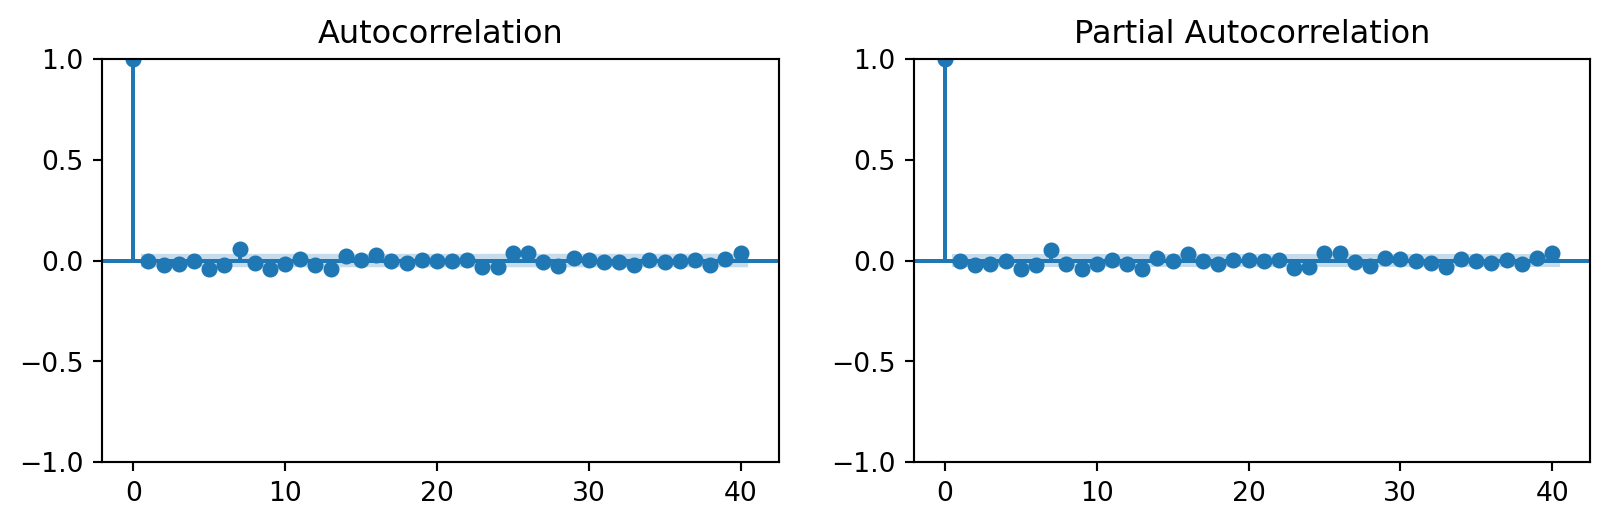

In [6]:
## ACF et PACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(10, 6))
plt.subplot(221)
plot_acf(data_train, ax=plt.gca(), lags=40)
plt.subplot(222)
plot_pacf(data_train, ax=plt.gca(), lags=40)
plt.show()

In [7]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats import boxcox
from statsmodels.stats.diagnostic import acorr_ljungbox

# Paramètres du modèle
p_max = 2
q_max = 2
best_aic = np.inf
best_order = (0, 0, 0)

# Chargement de la série temporelle (remplacer par la vraie série data_unindex)
# Exemple fictif avec des données aléatoires
np.random.seed(42)
data_unindex = data_train.copy()
data_unindex.reset_index(drop=True, inplace=True)

# Création de la matrice pour stocker les AIC
aic_matrix = pd.DataFrame(np.nan, index=[f"p={p}" for p in range(p_max+1)], 
                          columns=[f"q={q}" for q in range(q_max+1)])

bb_test = pd.DataFrame(0, index=[f"p={p}" for p in range(p_max+1)], 
                          columns=[f"q={q}" for q in range(q_max+1)])

# Boucle pour estimer les modèles et stocker les AIC
for p in range(p_max + 1):
    for q in range(q_max + 1):
        try:
            model = ARIMA(data_unindex, order=(p, 0, q))
            out = model.fit()
            aic_matrix.loc[f"p={p}", f"q={q}"] = out.aic  # Stockage de l'AIC
            
            # Test de la blancheur des résidus
            ljung_box_result = acorr_ljungbox(out.resid, lags=[1], return_df=True)
            p_value = ljung_box_result['lb_pvalue'].iloc[0]

            if p_value > 0.05:
                bb_test.loc[f"p={p}", f"q={q}"] = 1
            
            # Mise à jour du meilleur modèle
            if out.aic < best_aic :
                best_aic = out.aic
                best_order = (p, 0, q)
                
        except Exception as e:
            print(f"Erreur avec (p={p}, q={q}): {e}")

print(f"Meilleur modèle ARIMA: {best_order} avec AIC={best_aic}")

print("="*30)
print("Matrice des AIC:")
print(aic_matrix)
print("="*30)
print("Matrice des test de Lljung box (1 lorsque résidus non autocorrélés):")
print(bb_test)

Meilleur modèle ARIMA: (0, 0, 0) avec AIC=-20100.176479566246
Matrice des AIC:
              q=0           q=1           q=2
p=0 -20100.176480 -20098.205891 -20097.679059
p=1 -20098.227385 -20099.862840 -20097.046957
p=2 -20097.887027 -20098.545030 -20094.033191
Matrice des test de Lljung box (1 lorsque résidus non autocorrélés):
     q=0  q=1  q=2
p=0    1    1    1
p=1    1    1    1
p=2    1    1    1


In [8]:
p = 1
q = 0

AR1 = ARIMA(data_unindex, order=(p, 0, q))
print(AR1.fit().summary())

                               SARIMAX Results                                
Dep. Variable:             log_return   No. Observations:                 3523
Model:                 ARIMA(1, 0, 0)   Log Likelihood               10052.114
Date:                Fri, 28 Feb 2025   AIC                         -20098.227
Time:                        22:15:48   BIC                         -20079.726
Sample:                             0   HQIC                        -20091.627
                               - 3523                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0001      0.000      0.621      0.535      -0.000       0.001
ar.L1         -0.0037      0.012     -0.321      0.748      -0.027       0.019
sigma2         0.0002   2.16e-06     89.947      0.0

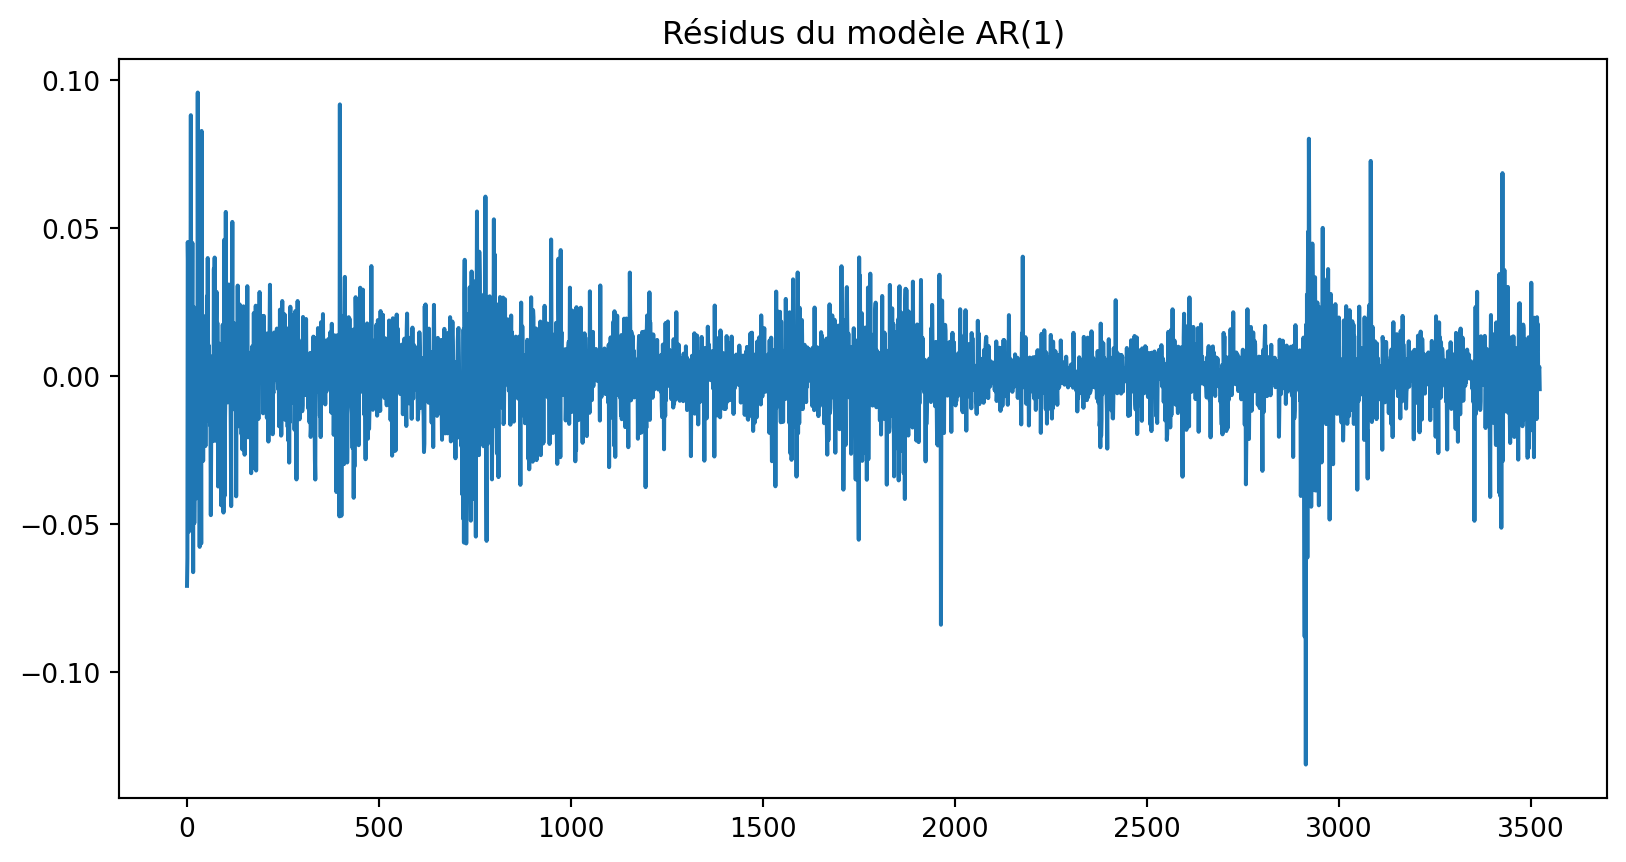

In [9]:
AR1_resid = AR1.fit().resid
plt.figure(figsize=(10, 5))
plt.plot(AR1_resid)
plt.title("Résidus du modèle AR(1)")
plt.show()

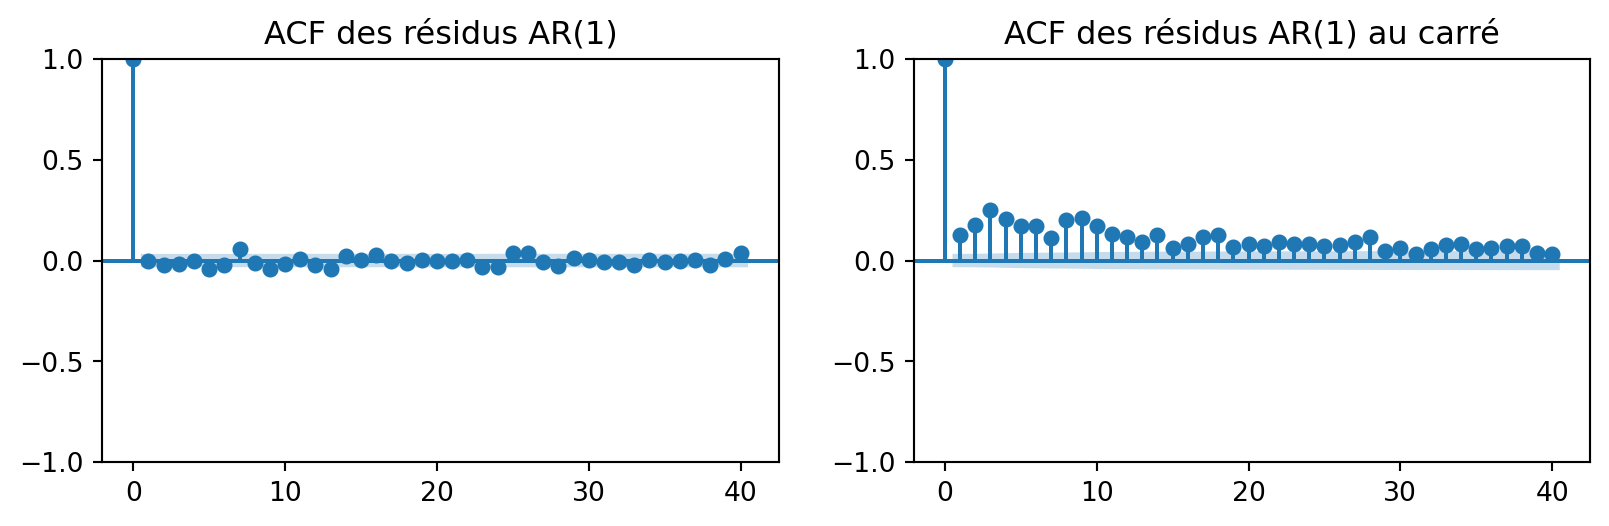

In [10]:
plt.figure(figsize=(10, 6))
plt.subplot(221)
plot_acf(AR1_resid, lags=40, ax=plt.gca())
plt.title("ACF des résidus AR(1)")
plt.subplot(222)
plot_acf(AR1_resid**2, lags=40, ax=plt.gca())
plt.title("ACF des résidus AR(1) au carré")
plt.show()

In [11]:
import numpy as np
import pandas as pd
from arch import arch_model

def find_garch(p_min, p_max, q_min, q_max, data, dist="normal"):
    """
    Trouve le meilleur modèle GARCH(p, q) en minimisant l'AIC.

    Paramètres :
    - p_min, p_max : Bornes pour p (ordre de l'AR dans la variance)
    - q_min, q_max : Bornes pour q (ordre de MA dans la variance)
    - data : Série temporelle utilisée pour l'estimation
    - dist : Distribution des erreurs ("normal", "t", "ged", etc.)

    Retour :
    - DataFrame contenant les valeurs de AIC pour chaque combinaison (p, q)
    - Meilleur modèle GARCH trouvé en fonction du critère AIC
    """
    
    best_aic = np.inf
    best_order = (0, 0, 0)
    
    results = []

    for p in range(p_min, p_max + 1):
        for q in range(q_min, q_max + 1):
            try:
                # Spécification du modèle GARCH(p, q)
                garch_spec = arch_model(data, vol='Garch', p=p, q=q, mean='Zero', dist=dist)
                out = garch_spec.fit(disp="off")
                
                # Calcul de l'AIC
                current_aic = out.aic * len(data)

                # Mettre à jour le meilleur modèle si un plus petit AIC est trouvé
                if current_aic < best_aic:
                    best_aic = current_aic
                    best_order = (p, 0, q)
                
                # Ajouter les résultats dans la liste
                results.append({'p': p, 'q': q, 'aic': current_aic, 'relative_gap': np.nan})
            
            except Exception as e:
                print(f"Erreur pour (p={p}, q={q}): {e}")
                continue
    
    # Convertir en DataFrame
    results_df = pd.DataFrame(results)

    # Calculer l'écart relatif par rapport au meilleur AIC
    results_df['relative_gap'] = (results_df['aic'] - best_aic) * 100 / best_aic
    
    return results_df, best_order

results_df, best_garch_order = find_garch(p_min=1, p_max=2, q_min=0, q_max=2, data=data_unindex, dist="normal")

print(f"Meilleur modèle GARCH: {best_garch_order} avec AIC={best_aic}")
print("="*30)
print("Résultats pour les modèles testés:")
results_df.sort_values(by='relative_gap', ascending=False)

Meilleur modèle GARCH: (1, 0, 1) avec AIC=-20100.176479566246
Résultats pour les modèles testés:


,p,q,aic,relative_gap
1,1,1,-7.493455e+07,-0.000000
4,2,1,-7.491663e+07,-0.023918
2,1,2,-7.486519e+07,-0.092567
5,2,2,-7.483014e+07,-0.139333
3,2,0,-7.189514e+07,-4.056091
0,1,0,-7.073946e+07,-5.598342


In [12]:
garch11 = arch_model(data_unindex, vol='Garch', p=1, q=1, mean='Zero', dist='normal')
print("="*78)
print("Résumé du modèle GARCH(1,1)")
print("="*78)
print(garch11.fit(disp="off").summary())

Résumé du modèle GARCH(1,1)
                       Zero Mean - GARCH Model Results                        
Dep. Variable:             log_return   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                10638.0
Distribution:                  Normal   AIC:                          -21270.1
Method:            Maximum Likelihood   BIC:                          -21251.6
                                        No. Observations:                 3523
Date:                Fri, Feb 28 2025   Df Residuals:                     3523
Time:                        22:15:48   Df Model:                            0
                              Volatility Model                              
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      3.8930e-06  4.514e-

In [13]:
cond_resid =garch11.fit(disp="off").conditional_volatility # Volatilité conditionnelle => sigma_t
resid = garch11.fit(disp="off").resid # résidus du modèle => eps_t
resid_std = garch11.fit(disp="off").std_resid  # résidus studentisés => eta_t

# jarque bera test

from scipy.stats import jarque_bera

jb_test = jarque_bera(resid_std)
print("H0: Les résidus studentisés suivent une loi normale")
print(f"Test de Jarque-Bera sur les résidus studentisés: JB={jb_test[0]}, p-value={jb_test[1]}")
# reject the null hypothesis of normality for the distribution of the residuals, 
# as a rule of thumb, which implies that the data to be fitted is not
# normally distributed

H0: Les résidus studentisés suivent une loi normale
Test de Jarque-Bera sur les résidus studentisés: JB=848.8557767883675, p-value=4.71313744144075e-185


In [14]:
### y revenir

### coeff <1

In [15]:
# Test d'homoscédasticité
# Ljung-Box test sur résidus
lb_test_resid = acorr_ljungbox(resid_std, lags=[i for i in range(1, 13)], return_df=True)
print("Ljung-Box Test sur résidus:\n", lb_test_resid)

# Ljung-Box test sur carrés des résidus
lb_test_resid_sq = acorr_ljungbox(resid_std**2, lags=[i for i in range(1, 13)], return_df=True)
print("Ljung-Box Test sur carrés des résidus:\n", lb_test_resid_sq)

Ljung-Box Test sur résidus:
      lb_stat  lb_pvalue
1   0.028087   0.866904
2   0.572026   0.751253
3   0.690100   0.875530
4   1.235029   0.872298
5   2.199461   0.820914
6   2.491801   0.869384
7   2.828137   0.900433
8   2.941010   0.938005
9   3.793237   0.924486
10  4.644433   0.913631
11  4.727144   0.943657
12  6.763448   0.872842
Ljung-Box Test sur carrés des résidus:
       lb_stat  lb_pvalue
1    0.280711   0.596235
2    0.339634   0.843819
3    6.670837   0.083163
4    7.395445   0.116409
5    8.091586   0.151260
6    8.233789   0.221471
7    8.724987   0.273009
8    9.386238   0.310768
9    9.938908   0.355454
10  11.579309   0.314198
11  13.394501   0.268325
12  13.845698   0.310670


In [16]:
# LM test pour les effets ARCH
from statsmodels.stats.diagnostic import het_arch

lm_test = het_arch(resid_std)
print('LM Test Statistique: %.3f, p-value: %.3f' % (lm_test[0], lm_test[1]))

LM Test Statistique: 12.218, p-value: 0.271


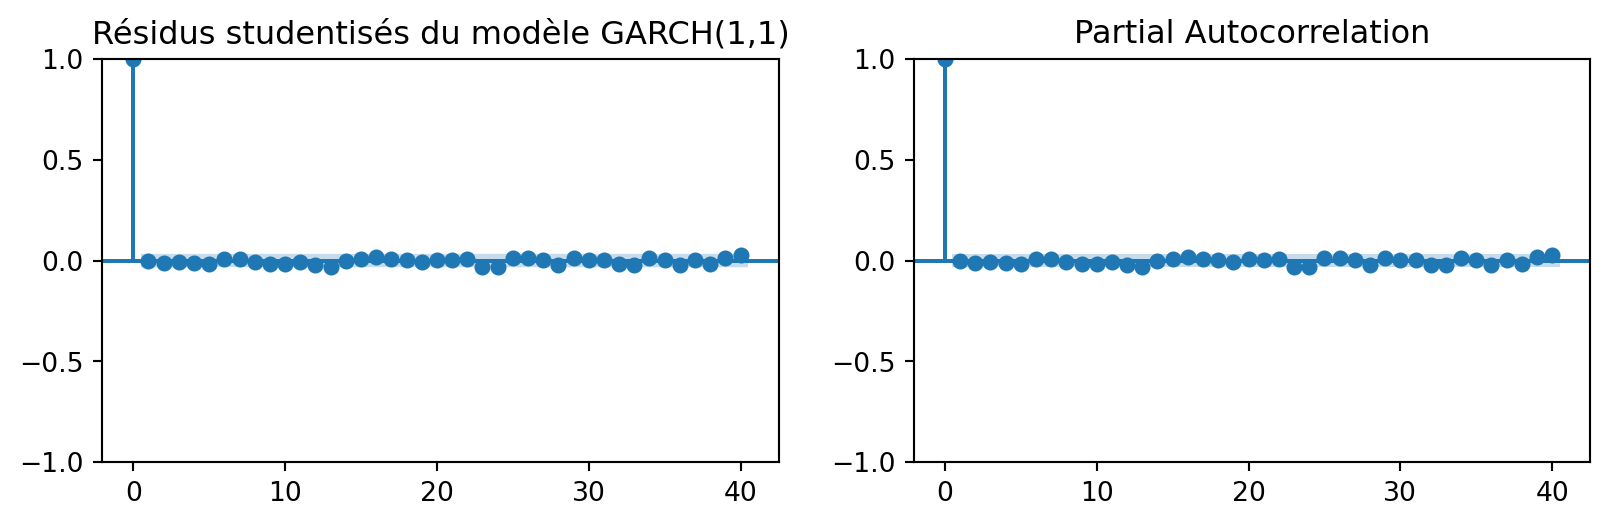

In [17]:
plt.figure(figsize=(10, 6))
plt.subplot(221)
plot_acf(resid_std, lags=40, ax=plt.gca())
plt.title("ACF des résidus studentisés")
plt.title("Résidus studentisés du modèle GARCH(1,1)")
plt.subplot(222)
plot_pacf(resid_std, lags=40, ax=plt.gca())
plt.show()

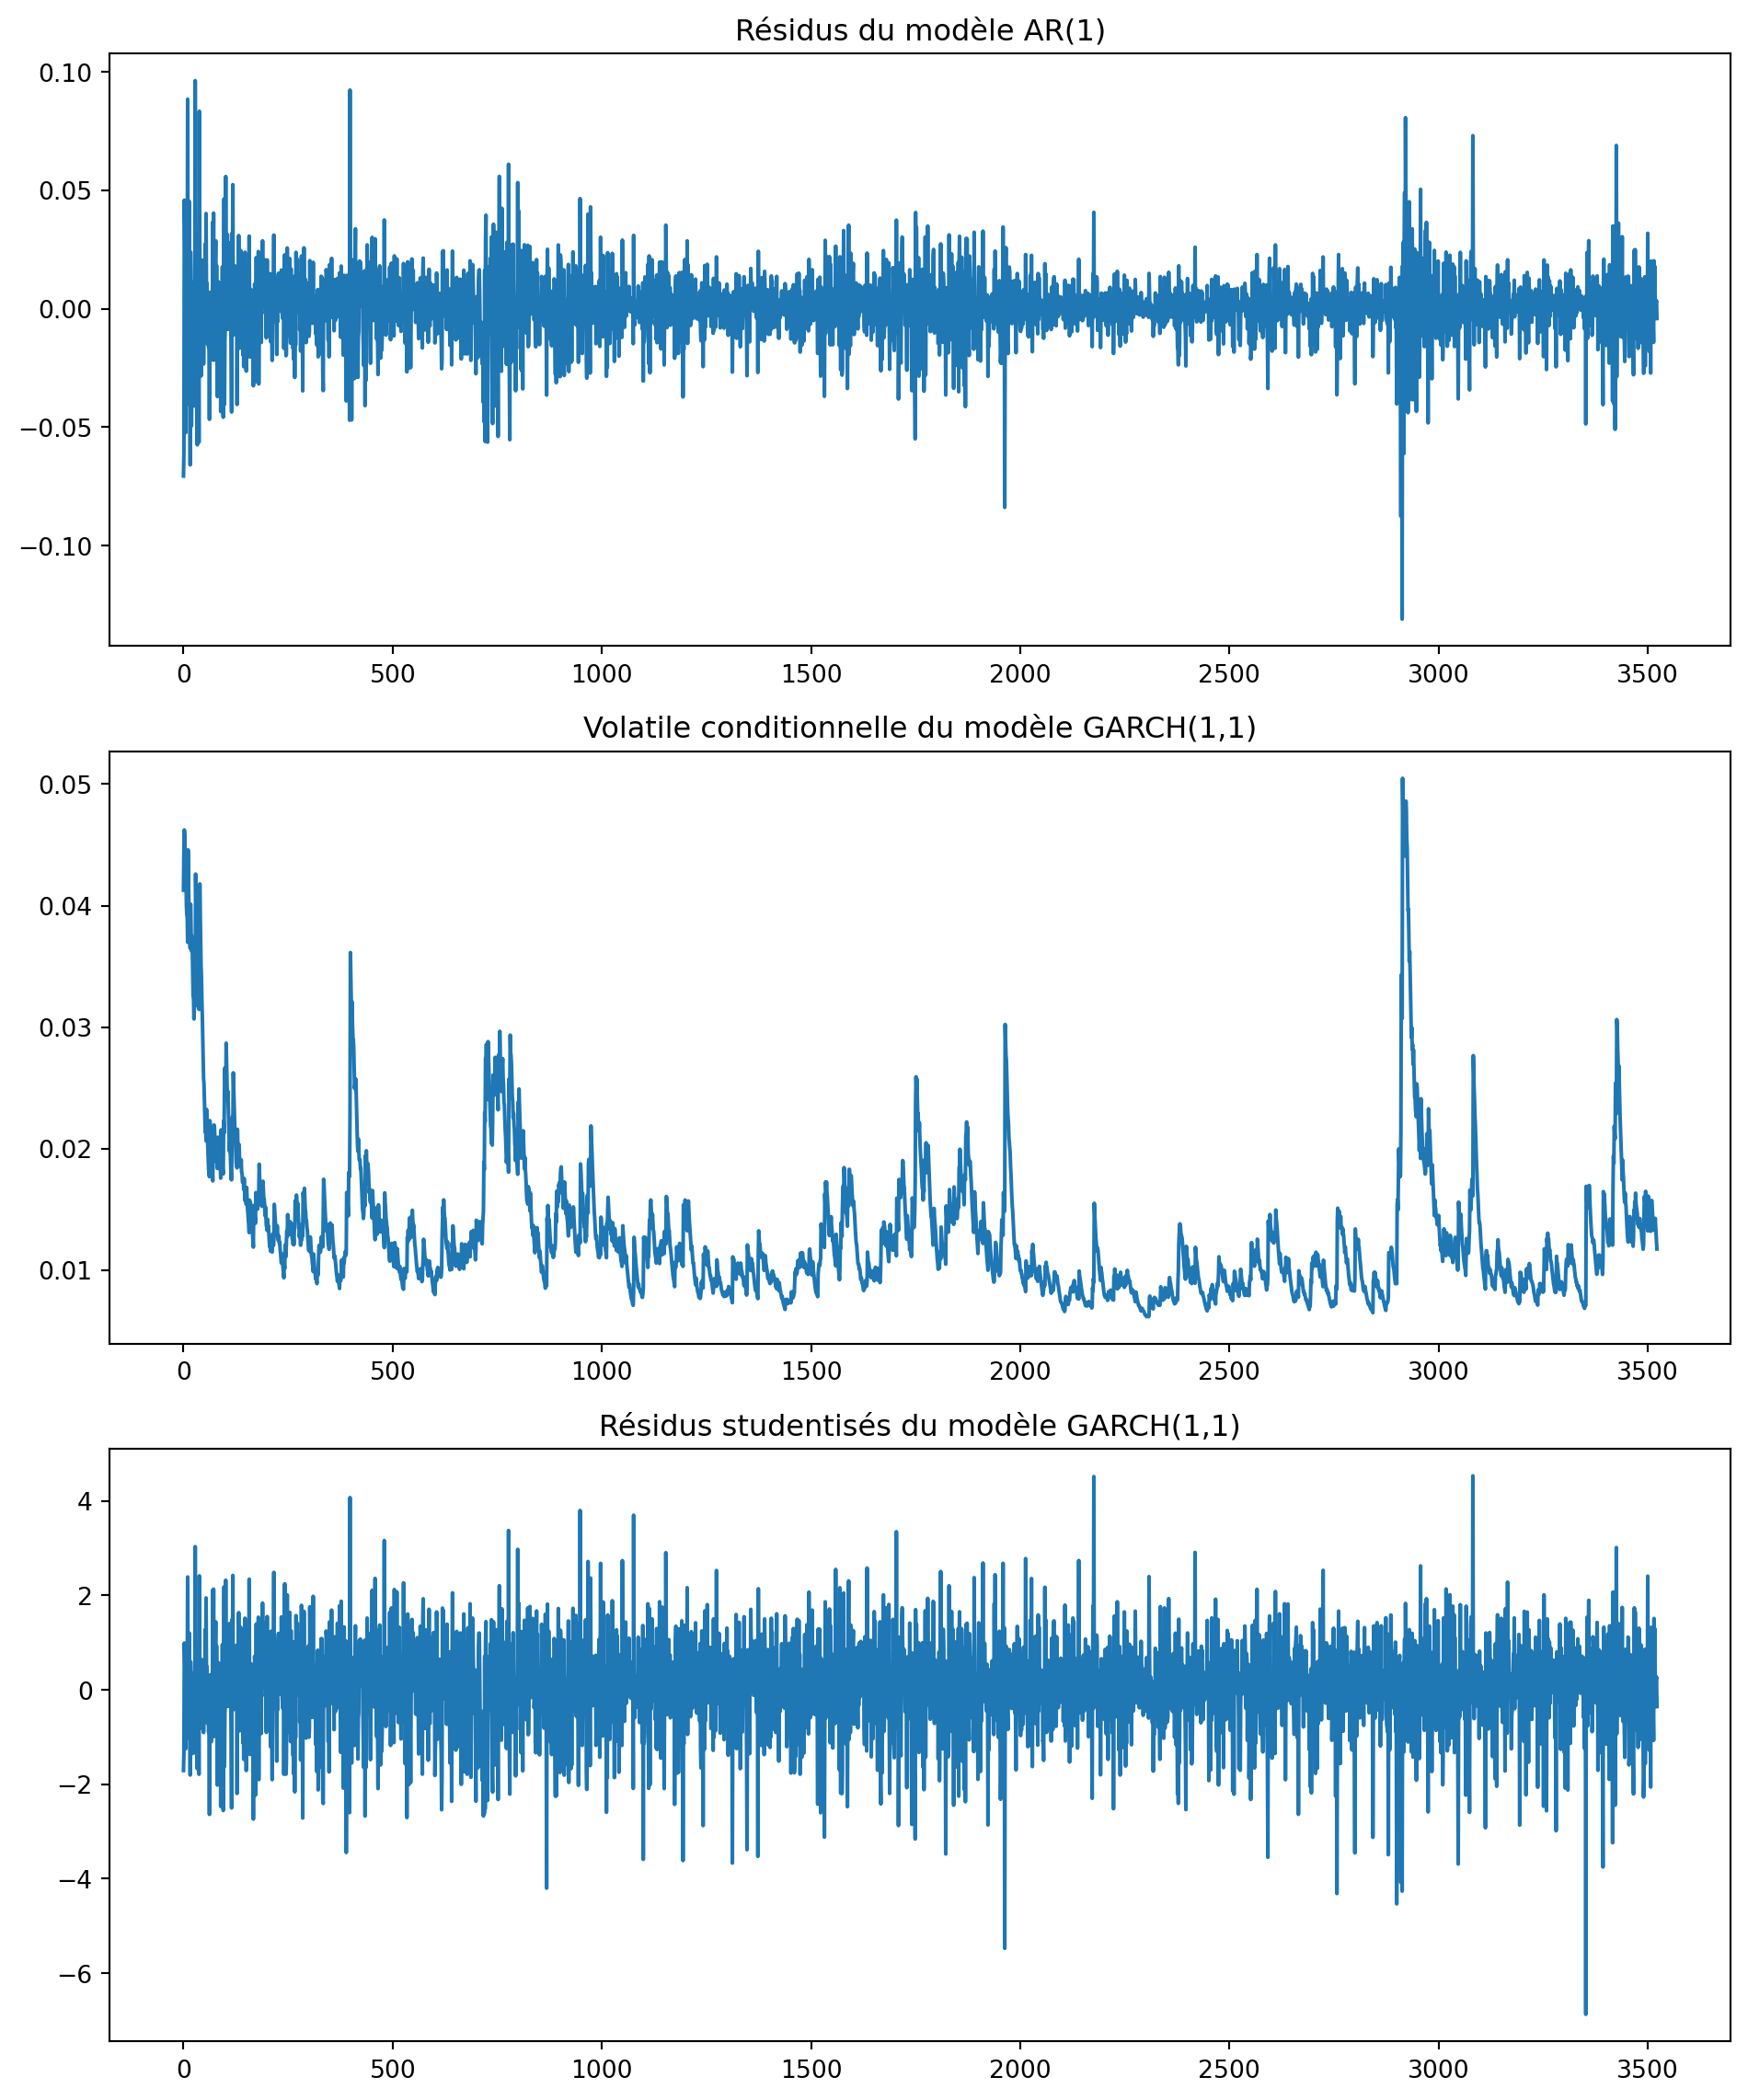

In [18]:
# Création de la figure avec des sous-graphiques alignés verticalement
plt.figure(figsize=(10, 12))

# Premier graphique : CAC 40
plt.subplot(311)
plt.plot(resid) 
plt.title("Résidus du modèle AR(1)")

# Deuxième graphique : Résidus du modèle AR(1)
plt.subplot(312)
plt.plot(cond_resid)
plt.title("Volatile conditionnelle du modèle GARCH(1,1)")

# Troisième graphique : Résidus studentisés du modèle GARCH(1,1)
plt.subplot(313)
plt.plot(resid_std, label='Résidus studentisés du modèle GARCH(1,1)')
plt.title("Résidus studentisés du modèle GARCH(1,1)")

# Affichage des graphiques
plt.tight_layout()
plt.show()

In [19]:
print(AR1.fit().summary())

# tester arima avec arch_model ou arch
mu = AR1.fit().params[0]
print(f"Paramètre mu: {mu}")
phi = AR1.fit().params[1]
print(f"Paramètre phi: {phi}")

                               SARIMAX Results                                
Dep. Variable:             log_return   No. Observations:                 3523
Model:                 ARIMA(1, 0, 0)   Log Likelihood               10052.114
Date:                Fri, 28 Feb 2025   AIC                         -20098.227
Time:                        22:15:48   BIC                         -20079.726
Sample:                             0   HQIC                        -20091.627
                               - 3523                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0001      0.000      0.621      0.535      -0.000       0.001
ar.L1         -0.0037      0.012     -0.321      0.748      -0.027       0.019
sigma2         0.0002   2.16e-06     89.947      0.0

In [20]:
print(garch11.fit(disp="off").summary())
omega = garch11.fit(disp="off").params[0]
print(f"Paramètre omega: {omega}")
a = garch11.fit(disp="off").params[1]
print(f"Paramètre alpha: {a}")
b = garch11.fit(disp="off").params[2]
print(f"Paramètre beta: {b}")

                       Zero Mean - GARCH Model Results                        
Dep. Variable:             log_return   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                10638.0
Distribution:                  Normal   AIC:                          -21270.1
Method:            Maximum Likelihood   BIC:                          -21251.6
                                        No. Observations:                 3523
Date:                Fri, Feb 28 2025   Df Residuals:                     3523
Time:                        22:15:48   Df Model:                            0
                              Volatility Model                              
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      3.8930e-06  4.514e-10   8624.704      0.000 [3.

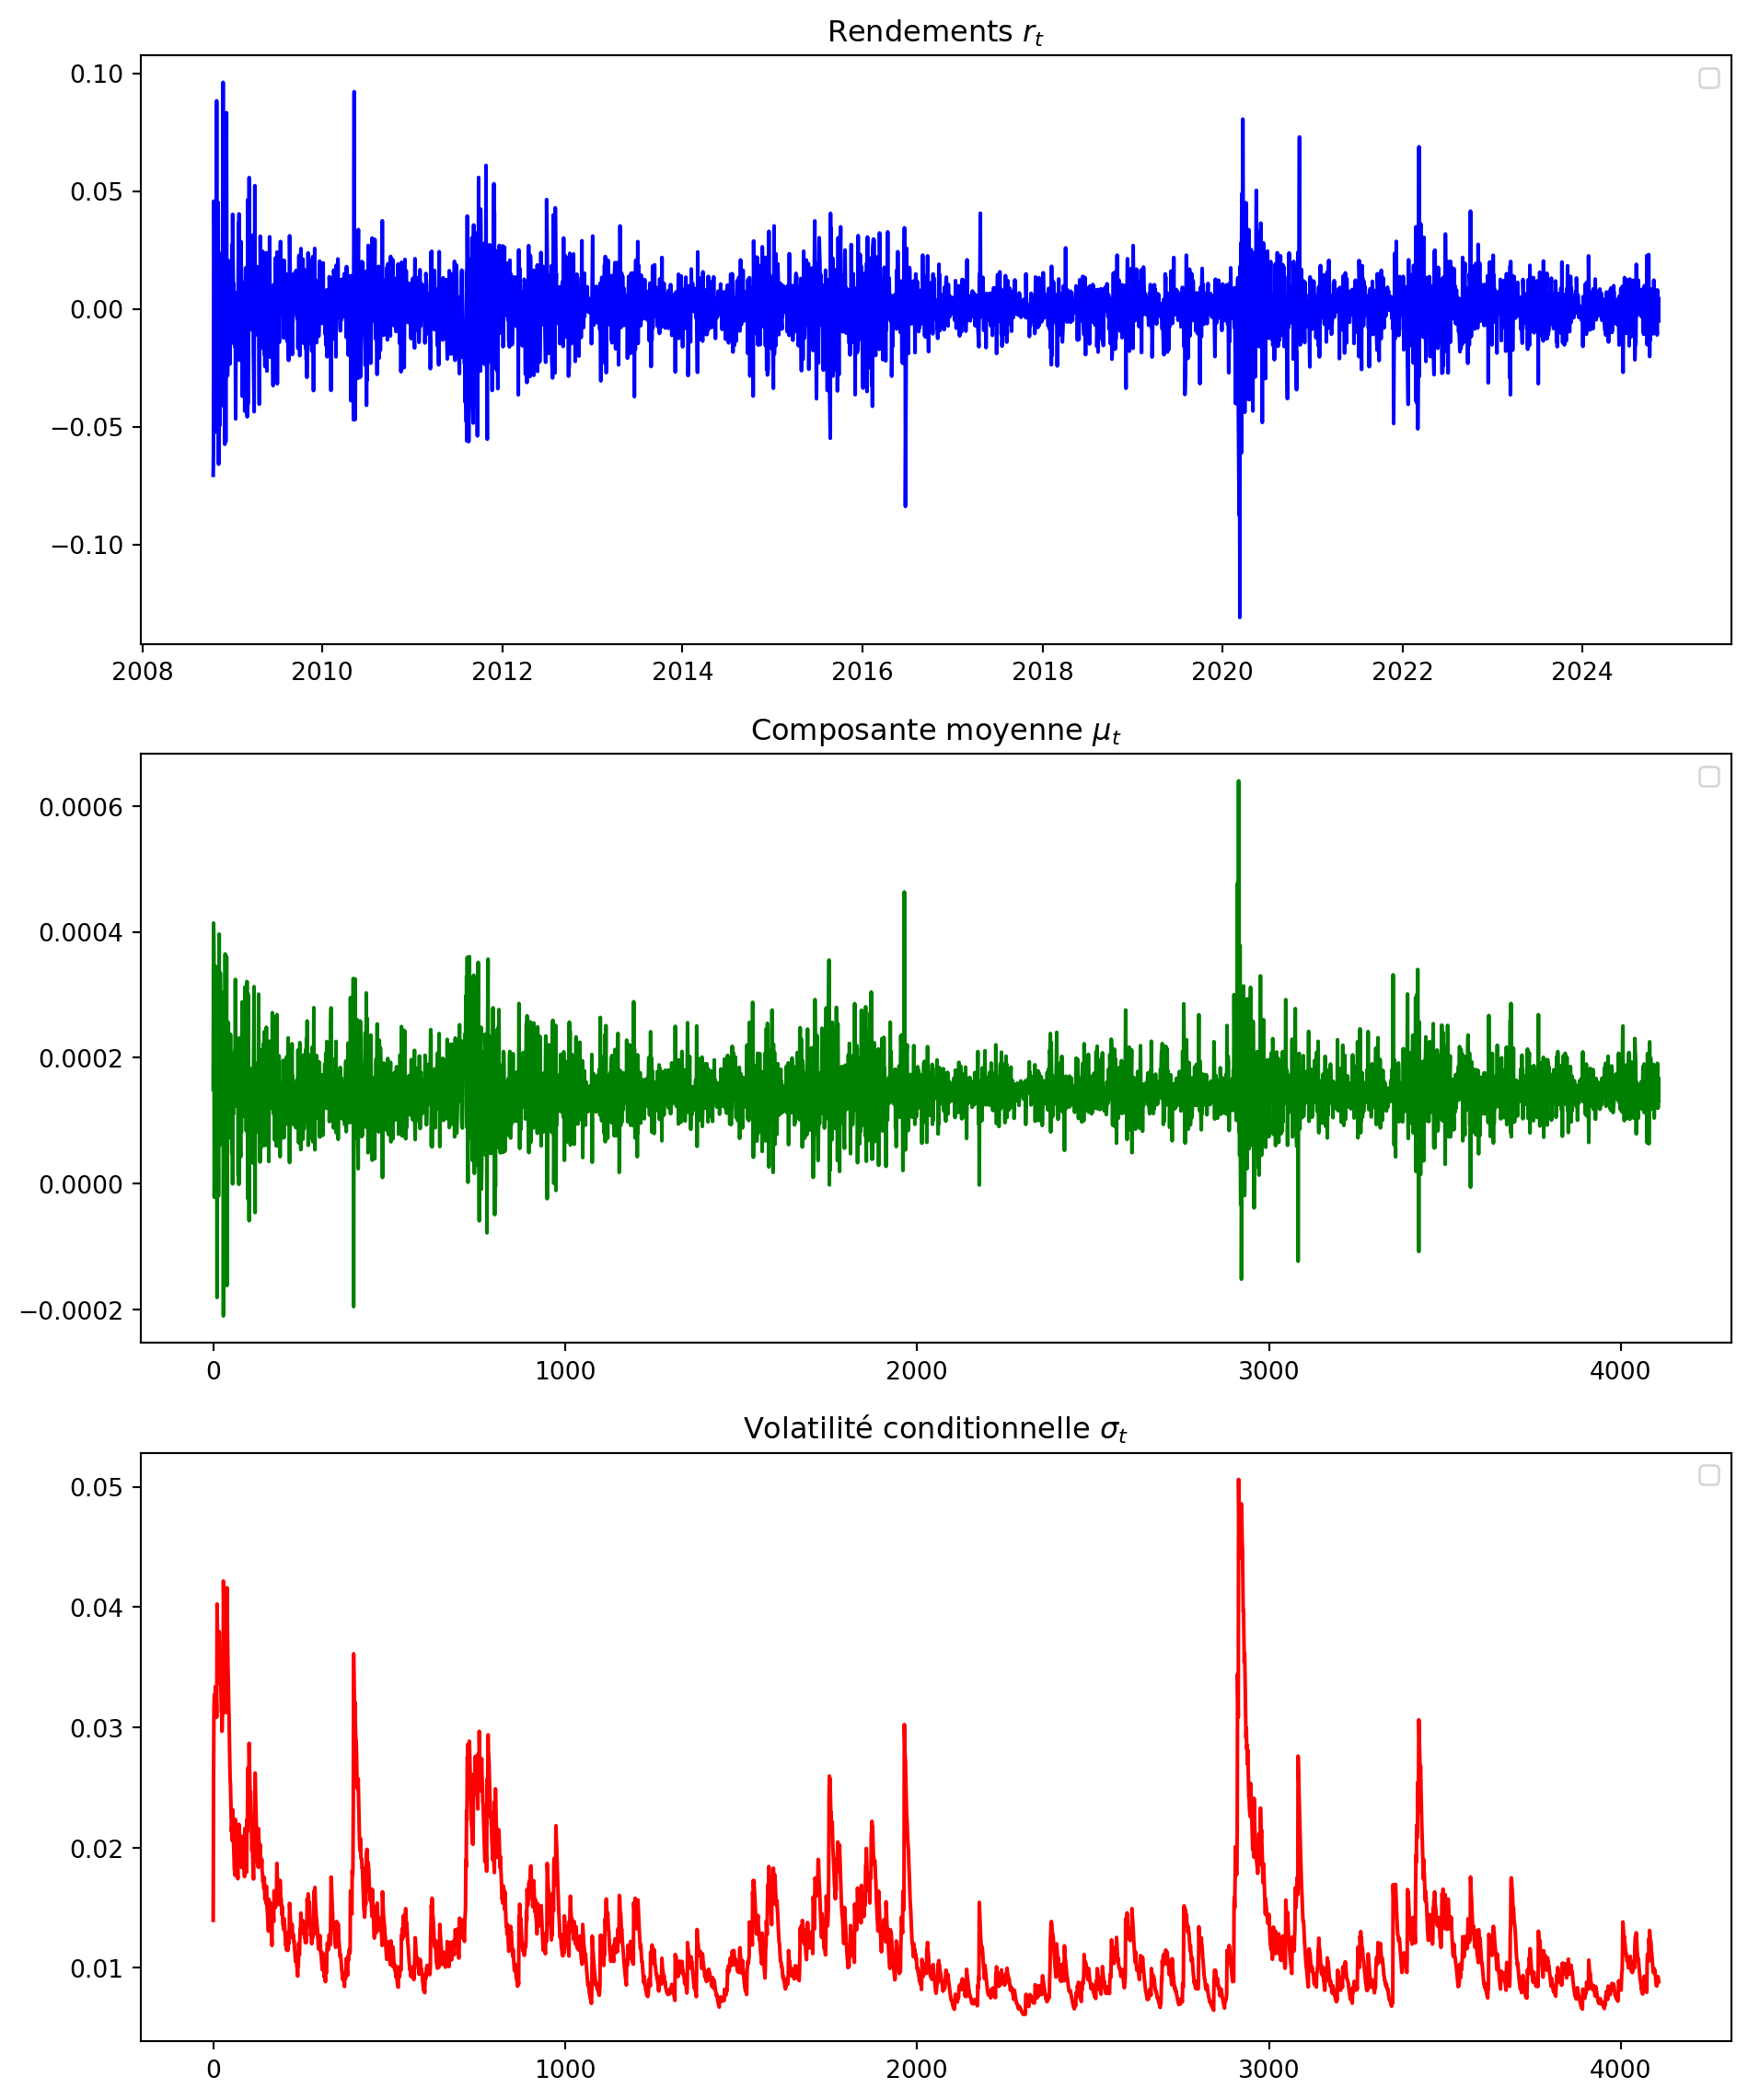

In [21]:
T_train = len(data_train)
T_test = len(data_test)

T = T_train + T_test

# Initialisation des séries
r = pd.concat([data_train, data_test], axis=0)
mu_t = np.zeros(T)    # Composante moyenne
sigma2 = np.zeros(T)  # Variance conditionnelle

# Conditions initiales
mu_t[0] = mu
sigma2[0] = omega / (1 - a - b)  # Variance de long terme

# Simulation du modèle
for t in range(1, T):
    mu_t[t] = mu + phi * r[t-1]  # Partie moyenne
    sigma2[t] = omega + a * (r[t-1] - mu_t[t-1])**2 + b * sigma2[t-1]  # Variance conditionnelle

# Affichage des résultats
fig, ax = plt.subplots(3, 1, figsize=(10, 12))

ax[0].plot(r, color="blue")
ax[0].set_title("Rendements $r_t$")
ax[0].legend()

ax[1].plot(mu_t, color="green")
ax[1].set_title("Composante moyenne $\mu_t$")
ax[1].legend()

ax[2].plot(np.sqrt(sigma2), color="red")
ax[2].set_title("Volatilité conditionnelle $\sigma_t$")
ax[2].legend()

plt.tight_layout()
plt.show()

In [22]:
# VaR historique

def historical_var(data, alpha=0.99):
    """
    Calcul de la VaR historique
    data : les rendements logarithmiques
    alpha : le niveau de confiance
    """
    return -np.percentile(data, 100*(1 - alpha))

# VaR gaussienne

def gaussian_var(data, alpha):
    """
    Calcul de la VaR gaussienne
    data : les rendements logarithmiques
    alpha : le niveau de confiance
    """
    from scipy.stats import norm

    mu = np.mean(data)
    sigma = np.std(data)
    return -(mu + sigma * norm.ppf(1 - alpha))

# Loi de Skew Student par maximum de vraisemblance.

from scipy.optimize import minimize
from scipy.stats import t


def skew_student_pdf(x, mu, sigma, gamma, nu ):
    """
    Compute the Skew Student-t probability density function (PDF).
    """
    

    t_x = ((x - mu) * gamma / sigma) * np.sqrt((nu + 1) / (nu + ((x - mu) / sigma) ** 2))
    # PDF of the standard Student-t distribution
    pdf_t = t.pdf(x , df=nu,  loc=mu, scale=sigma)
    # CDF of the transformed Student-t distribution
    cdf_t = t.cdf(t_x, df=nu + 1,loc=0, scale=1)

    # Skew Student density function
    density = 2 * pdf_t * cdf_t

    return density


def skew_student_log_likelihood(params, data):
    """
    Calcul de la log-vraisemblance de la loi de Skew Student
    params [mu, sigma, gamma, nu]: les paramètres de la loi
    data : les rendements logarithmiques
    """
    mu, sigma, gamma, nu = params
    density = skew_student_pdf(data , mu, sigma, gamma, nu)
    # log-vraisemblance
    loglik = np.sum(np.log(density))
    
    return - loglik

# Optimisation des paramètres avec contraintes de positivité sur sigma et nu
def skew_student_fit(data):
    """
    Estimation des paramètres de la loi de Skew Student
    """
    # initial guess
    x0 = np.array([np.mean(data), np.std(data), 1, 4])

    # contraintes
    bounds = [(None, None), (0, None), (None, None), (None, None)]

    # optimisation
    res = minimize(skew_student_log_likelihood, x0, args=(data), bounds=bounds)

    return res.x

params = skew_student_fit(resid_std)
print("="*80)
print("Les paramètres estimés de la loi de Skew Student sont : ")
print("-"*15)
print("Mu : ", params[0])
print("Sigma : ", params[1])
print("Gamma : ", params[2])
print("Nu : ", params[3])
print("="*80)


params_sstd = {
    "mu" : params[0], 
    "sigma" : params[1],
    "gamma" : params[2],
    "nu" : params[3]
}


## Intégration de la fonction de densité
from scipy import integrate
from scipy.optimize import minimize_scalar

def integrale_SkewStudent(x,params):
    borne_inf = -np.inf
    resultat_integration, erreur = integrate.quad(lambda x: skew_student_pdf(x, **params), borne_inf, x)
    return resultat_integration

def fonc_minimize(x, alpha,params):
    value = integrale_SkewStudent(x,params)-alpha
    return abs(value)

def skew_student_quantile(alpha,mu, sigma, gamma, nu ):
    params = {
    "mu" : mu ,
    "sigma" : sigma,
    "gamma" : gamma,
    "nu" : nu
    }

    if alpha <0 or alpha >1:
        raise Exception("Veuillez entrer un niveau alpha entre 0 et 1")
    else:
        resultat_minimisation = minimize_scalar(lambda x: fonc_minimize(x, alpha,params))
        return resultat_minimisation.x
    
# Objectif : écrire une fonction qui calcule la VaR skew-student

def sstd_var(alpha, params):
    """
    Calcul de la VaR skew student
    data : les rendements logarithmiques
    alpha : le niveau de confiance
    """

    return -skew_student_quantile(1-alpha, **params)


#### A FAIRE VAR POT et BM

from scipy.stats import genextreme as gev

import numpy as np
import pandas as pd
neg_resid = -resid_std

def get_extremes(returns, block_size, min_last_block=0.6):
    """
    Extrait les valeurs extrêmes d'une série de rendements par blocs.
    
    Arguments :
    returns : pandas Series (index = dates, valeurs = rendements)
    block_size : int, taille du bloc en nombre de jours
    min_last_block : float, proportion minimale pour inclure le dernier bloc incomplet
    
    Retourne :
    maxima_sample : liste des valeurs maximales par bloc
    maxima_dates : liste des dates associées aux valeurs maximales
    """
    n = len(returns)
    num_blocks = n // block_size

    maxima_sample = []
    maxima_dates = []

    for i in range(num_blocks):
        block_start = i * block_size
        block_end = (i + 1) * block_size
        block_data = returns.iloc[block_start:block_end]  # Sélectionner le bloc avec les index

        max_value = block_data.max()
        max_date = block_data.idxmax()  # Récupérer l'index de la valeur max

        maxima_sample.append(max_value)
        maxima_dates.append(max_date)

    # Gestion du dernier bloc s'il reste des données suffisantes
    block_start = num_blocks * block_size
    block_data = returns.iloc[block_start:]

    if len(block_data) >= min_last_block * block_size:
        max_value = block_data.max()
        max_date = block_data.idxmax()
        
        maxima_sample.append(max_value)
        maxima_dates.append(max_date)
        
    return pd.Series(maxima_sample, index=maxima_dates)  # Retourner une Series avec les dates comme index



def BM_var(alpha,s,shape,loc,scale):
    """
    Calcul de la VaR gaussienne
    alpha : le niveau de confiance de la VaR
    s : le nombre de jours dans un bloc
    """
    alpha_bm = 1-s*(1-alpha)

    return gev.ppf(alpha_bm, shape, loc = loc, scale = scale),alpha_bm

extremes = get_extremes(neg_resid, block_size=21, min_last_block=0.6)
params_gev = gev.fit(extremes)
print("="*80)
print("Les paramètres estimés de la loi de GEV sont : ")
print("-"*15)
print(f"Shape (xi) = {params_gev[0]:.2f}")
print(f"Localisation (mu) = {params_gev[1]:.2f}")
print(f"Echelle (sigma) = {params_gev[2]:.2f}")
print("="*80)


def POT_var(data,alpha,u,shape,loc,scale):
    """
    Calcul de la VaR gaussienne
    alpha : le niveau de confiance de la VaR
    s : le nombre de jours dans un bloc
    """
    n = len(data)
    excess_values = [value - u for value in data if value >= u]
    nu = len(excess_values)

    alpha_pot = 1-n*(1-alpha)/nu

    return genpareto.ppf(alpha_pot, shape, loc = loc, scale = scale) + u,alpha_pot


u = 0.03
excess_values = [value - u for value in neg_resid if value >= u]

from scipy.stats import genpareto

params_gpd = genpareto.fit(excess_values)

# Afficher les paramètres estimés
print("="*80)
print("Paramètres estimés de la distribution GPD:")
print(f"Shape (xi) = {params_gpd[0]:.2f}")
print(f"Localisation (mu) = {params_gpd[1]:.2f}")
print(f"Echelle (sigma) = {params_gpd[2]:.2f}")
print("="*80)

Les paramètres estimés de la loi de Skew Student sont : 
---------------
Mu :  0.42506987856855155
Sigma :  0.8686238872541445
Gamma :  -0.6074089740677895
Nu :  5.607559653340765
Les paramètres estimés de la loi de GEV sont : 
---------------
Shape (xi) = -0.01
Localisation (mu) = 1.64
Echelle (sigma) = 0.72
Paramètres estimés de la distribution GPD:
Shape (xi) = -0.04
Localisation (mu) = 0.00
Echelle (sigma) = 0.80


In [23]:
alpha = 0.99

var_hist_train = historical_var(resid_std, alpha=alpha)
var_gauss_train = gaussian_var(resid_std, alpha=alpha)
var_sstd_train = sstd_var(alpha, params_sstd)
var_BM_train,_ = BM_var(0.99, 21, *params_gev)
var_POT_train,_ = POT_var(neg_resid, alpha, u,*params_gpd)

# in a df
var = pd.DataFrame({
    'Historique': [var_hist_train],
    'Gaussienne': [var_gauss_train],
    'Skew Student': [var_sstd_train],
    'Block Maxima': [var_BM_train],
    'Peak Over Threshold': [var_POT_train]
})

print("="*80)
print("Value at Risk sur les résidus studentisés (en %) pour h=1j")
print(round(100*var,2))
print("="*80)


Value at Risk sur les résidus studentisés (en %) pour h=1j
   Historique  Gaussienne  Skew Student  Block Maxima  Peak Over Threshold
0      264.12      229.76        280.29        268.68               284.98


In [24]:
var_t = np.zeros(T_test)    # Composante moyenne
nb_exp = 0
for t in range(T_test):
    var_t[t] = - (mu_t[t+T_train] + np.sqrt(sigma2[t+T_train])*var_hist_train)
    nb_exp += (r[t+T_train] < var_t[t]).astype(int)
    
var_t = pd.Series(var_t, index=data_test.index)
print(f"Nombre d'exceptions = {nb_exp} sur {T_test} jours")

Nombre d'exceptions = 4 sur 586 jours


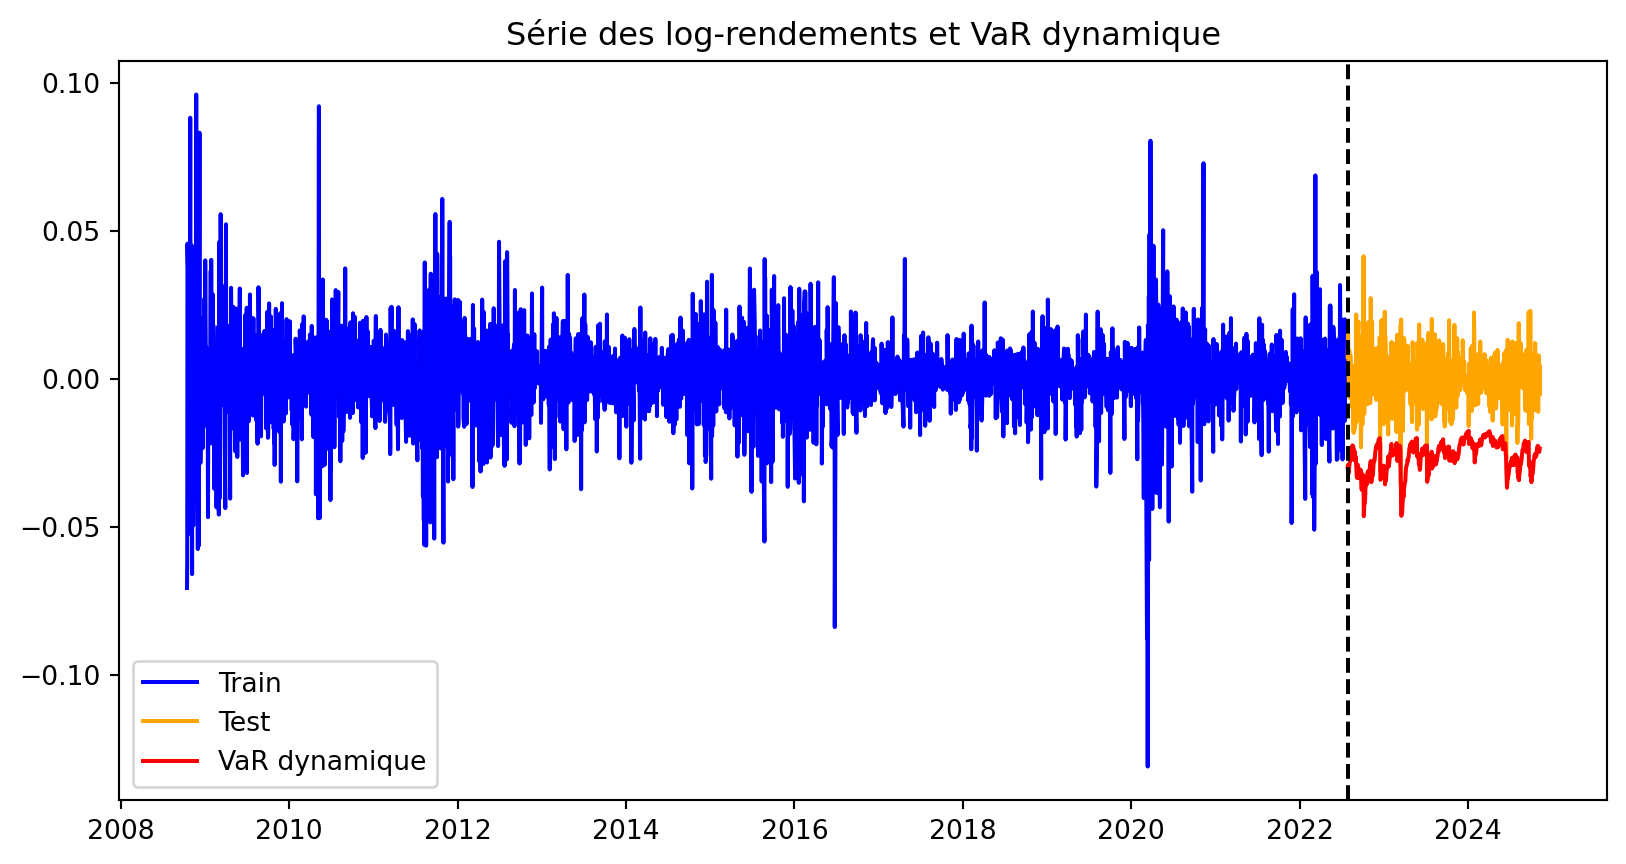

In [25]:
plt.figure(figsize=(10, 5))
plt.plot(data_train, color="blue", label='Train')
plt.plot(data_test, color="orange", label='Test')
plt.plot(var_t, color="red",label='VaR dynamique')
plt.axvline(x=data_test.index[0], color='black', linestyle='--')
plt.legend()
plt.title('Série des log-rendements et VaR dynamique')
plt.show()

Text(0.5, 1.0, 'Zoom sur la VaR dynamique')

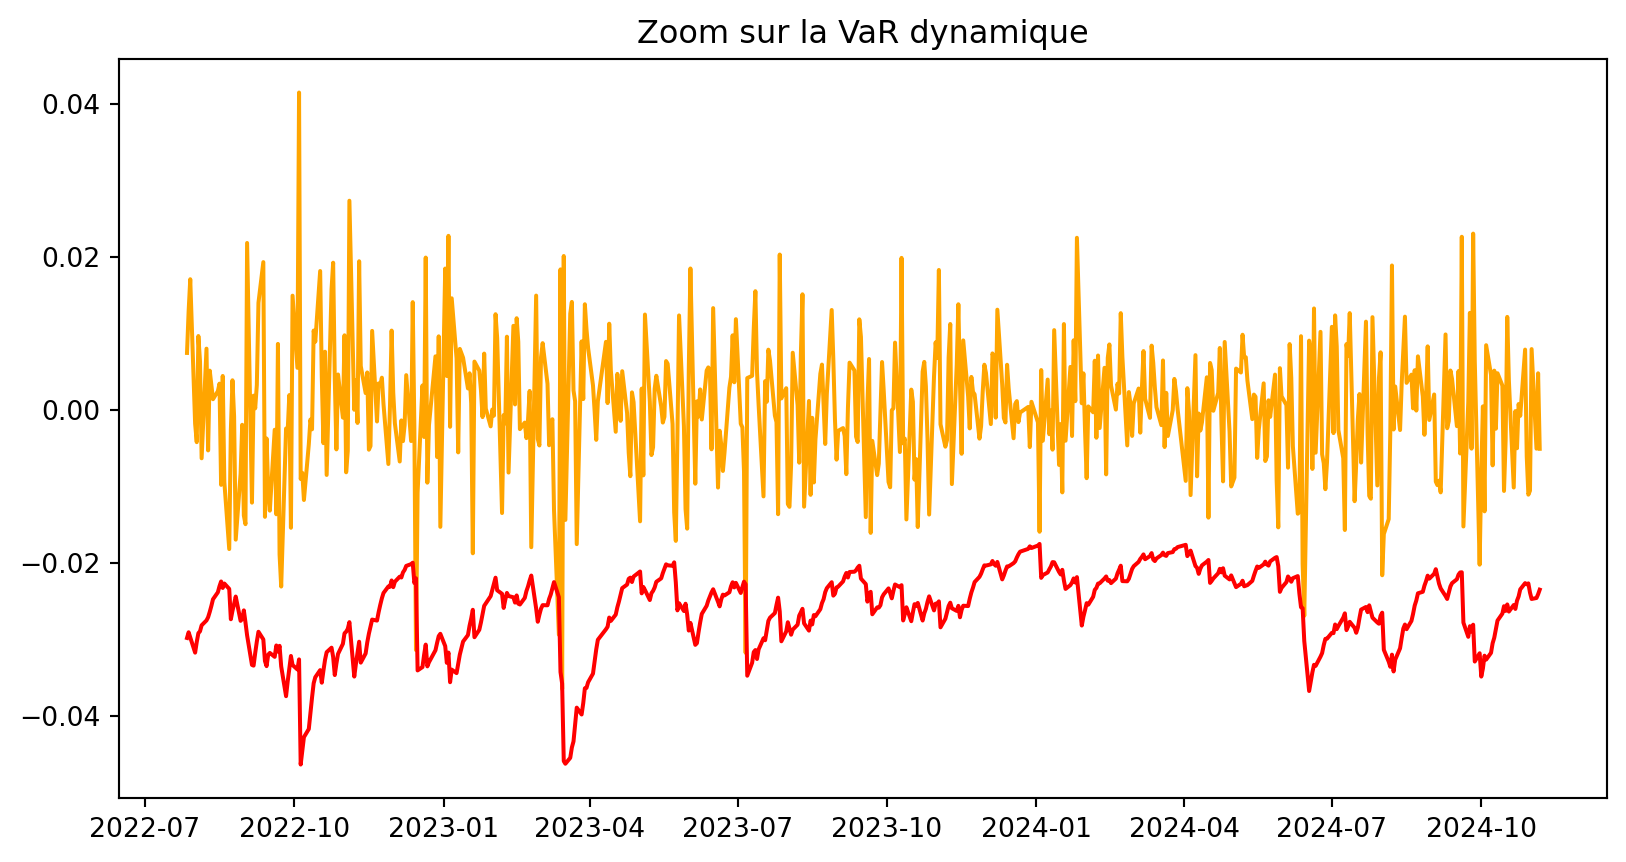

In [26]:
plt.figure(figsize=(10, 5))
plt.plot(data_test, color="orange")
plt.plot(var_t, color="red")
plt.title('Zoom sur la VaR dynamique')

In [27]:
# backtest à faire (optionnel)